# PHYS 432 HW 3, swimming in syrup

Ruijia Yang, 2022-03-10

In collaboration with Alexandre Stuart.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Import sympy to solve the equation.

In [11]:
from sympy.solvers import solve
from sympy import Symbol

In [ ]:
x = Symbol('x', real=True)

Generate evenly spaced $\nu$ on a log scale; then solve equation for each $\nu$ value.

In [171]:
nu_range = np.logspace(-2,2,100)

In [225]:
speed_range = [solve(188*ind_nu*(x**2)+20*(x**3)+628*(x**3) - (6.4E8), x) for ind_nu in nu_range]

Plotting velocity vs $\nu$, and add different kinematic viscosity values

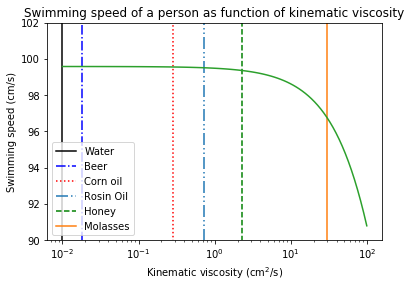

In [228]:
plt.plot([0.01,0.01],[0,2200],'k-')       # Water
plt.plot([0.018,0.018],[0,2200],'b-.')    # Beer
plt.plot([0.287,0.287],[0,2200],'r:')     # corn oil
plt.plot([0.73,0.73],[0,2200],linestyle=(0, (8, 2, 1, 2, 1, 2)))   # Honey
plt.plot([2.28,2.28],[0,2200],'g--')      # Rosin Oil
plt.plot([30,30],[0,2200])                # Molasses

plt.plot(nu_range,speed_range)

plt.xscale('log')
plt.xlabel('Kinematic viscosity (cm$^2$/s)')
plt.ylabel('Swimming speed (cm/s)')
plt.ylim([90,102])
plt.title('Swimming speed of a person as function of kinematic viscosity')
plt.legend(['Water', 'Beer','Corn oil','Rosin Oil','Honey','Molasses'])
plt.savefig('molasses.pdf',format='pdf')
plt.show()

Now let's look up some kinematic viscosities. 

Water: $\nu_{\textrm{water}} = 0.01\textrm{ cm}^2\textrm{/s}$

Rest looking up from reference; all unit given in cm$^2$/s

- Beer: 0.018

- Corn oil: $\thicksim0.287$

- Rosin oil: $\thicksim2.28$ (take an average between 86.6 and 35.2)

- Molasses C, blackstrap: $\thicksim30$ (take an order of magnitude)

- Honey: 0.73

__Reference__

Engineering ToolBox, (2003). Liquids - Kinematic Viscosities [online]. Available at: https://www.engineeringtoolbox.com/kinematic-viscosity-d_397.html (Accessed 2022-03-10).

__Part 3__: y axis now is % difference

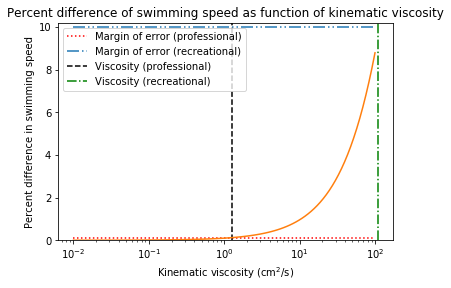

In [243]:
plt.plot([0.01,100],[0.12, 0.12],'r:')
plt.plot([0.01,100],[10, 10],linestyle=(0, (8, 2, 1, 2, 1, 2)))
plt.plot([1.28,1.28],[0,2200],'k--') # Viscosity professional
plt.plot([109,109],[0,2200],'g-.')   # Viscosity recreational

plt.plot(nu_range,(np.abs(np.array(speed_range)-speed_range[0])))

plt.xscale('log')
plt.xlabel('Kinematic viscosity (cm$^2$/s)')
plt.ylabel('Percent difference in swimming speed')
plt.ylim([0,10.2])
plt.title('Percent difference of swimming speed as function of kinematic viscosity')
plt.legend(['Margin of error (professional)', 'Margin of error (recreational)','Viscosity (professional)',
            'Viscosity (recreational)'])
plt.savefig('molasses_diff.pdf',format='pdf')
plt.show()

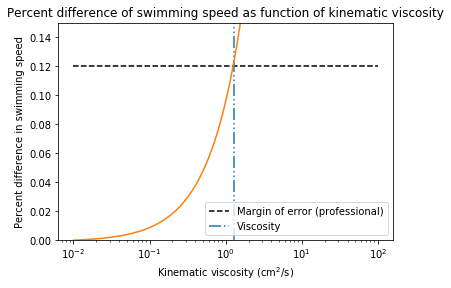

In [240]:
plt.plot([0.01,100],[0.12, 0.12],'k--')
plt.plot([1.28,1.28],[0,2200],linestyle=(0, (8, 2, 1, 2, 1, 2)))

plt.plot(nu_range,np.abs((np.array(speed_range)-speed_range[0])))

plt.xscale('log')
plt.xlabel('Kinematic viscosity (cm$^2$/s)')
plt.ylabel('Percent difference in swimming speed')
plt.ylim([0,0.15])
plt.title('Percent difference of swimming speed as function of kinematic viscosity')
plt.legend(['Margin of error (professional)','Viscosity'])
plt.savefig('molasses_diff_inset.pdf',format='pdf')
plt.show()

Typical margin of error in professional swimmers - a fraction of a second from my memory of watching Olympic games.
Going by the video below [1], for a race of 100 m in Tokyo, the winner (Dressel) swam in 47.02 s. The silver medalist (Chalmers) swam in 47.08 s. The speed difference is thus a mere 0.12%:

$$\frac{\frac{10000\textrm{ cm}}{47.02\textrm{ s}} - \frac{10000\textrm{ cm}}{47.08\textrm{ s}}}{\frac{10000\textrm{ cm}}{47.02\textrm{ s}}}\times100 = 0.12\%$$


Typical margin of error in recreational swimmers: let's take the same race, assume time of 80 s and 100 s. This would be a 20% difference in speed.

__Reference__

[1] Olympic Games. Men's 100m Freestyle Final - Tokyo Replays. Available at https://www.youtube.com/watch?v=tx2DaIcoNLQ. Visioned on 2022-03-10.
